In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.metrics import root_mean_squared_error

### Load Data

In [2]:
cases = pd.read_csv('./data/covid_cases_weekly', index_col=0)
deaths = pd.read_csv('./data/covid_deaths_weekly', index_col=0)

### Focusing on Florida

In [3]:
state = 'FL'

In [4]:
florida_cases = cases[cases['State'] == state].drop(columns=['State', 'StateFIPS'])
florida_deaths = deaths[deaths['State'] == state].drop(columns=['State', 'StateFIPS'])
florida_cases = florida_cases.iloc[1:]
florida_deaths = florida_deaths.iloc[1:]

In [5]:
florida_case_sums = florida_cases[florida_cases.columns[3:]].sum()
florida_death_sums = florida_deaths[florida_deaths.columns[3:]].sum()
florida_new_cases = florida_case_sums.diff()[1:]
florida_new_deaths = florida_death_sums.diff()[1:]

### Plotting New Florida Cases and Deaths vs. Time

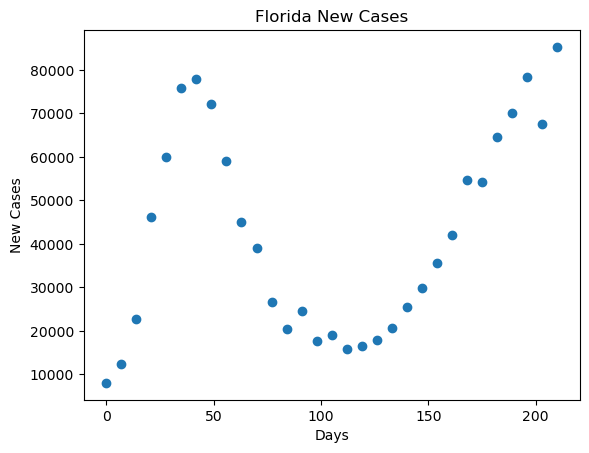

In [6]:
x = np.arange(len(florida_new_cases)) * 7
plt.scatter(x, florida_new_cases)
plt.title('Florida New Cases')
plt.xlabel('Days')
plt.ylabel('New Cases')
plt.show()

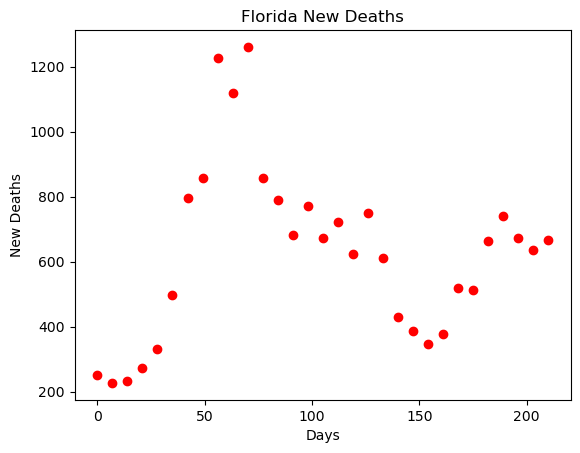

In [7]:
plt.scatter(x, florida_new_deaths, color='red')
plt.title('Florida New Deaths')
plt.xlabel('Days')
plt.ylabel('New Deaths')
plt.show()

### Fit Linear Regression Models

In [8]:
cases_linear = LinearRegression()
deaths_linear = LinearRegression()
reshape = lambda a: a.copy().reshape(-1, 1)
cases_linear.fit(reshape(x), florida_new_cases)
deaths_linear.fit(reshape(x), florida_new_deaths)

LinearRegression()

### Get Predictions and plot with 1 week prediction into the future

In [9]:
x_ext = np.arange(len(florida_new_cases) + 1) * 7
cases_pred_linear = cases_linear.predict(reshape(x_ext))
deaths_pred_linear = deaths_linear.predict(reshape(x_ext))

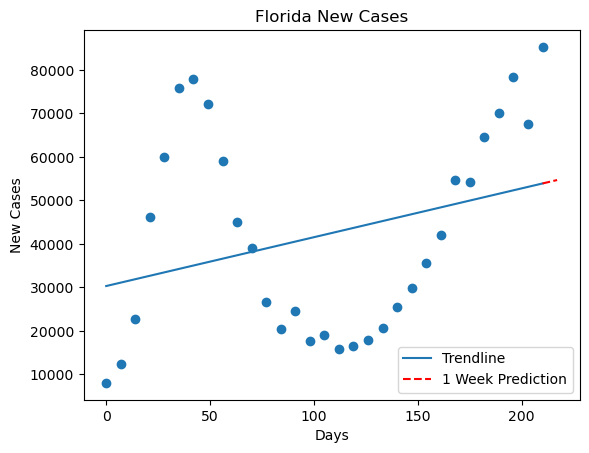

In [12]:
# Plot the original data points
plt.scatter(x, florida_new_cases)

# Plot the trendline for the existing data
plt.plot(x, cases_pred_linear[:-1], label='Trendline')

# Plot the extended part of the trendline with a different style
plt.plot(x_ext[-2:], cases_pred_linear[-2:], 'r--', label='1 Week Prediction')

# Add title and labels
plt.title('Florida New Cases')
plt.xlabel('Days')
plt.ylabel('New Cases')

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.show()

In [11]:
plt.scatter(x_deaths, florida_new_deaths, color='red')
plt.plot(x_deaths, deaths_pred_linear, color='red')
plt.title('Florida New Deaths')
plt.xlabel('Days')
plt.ylabel('New Deaths')
plt.show()

NameError: name 'x_deaths' is not defined

### Non-Linear Model (polynomial degree 2)

In [ ]:
x_cases = np.arange(len(florida_new_cases)) * 7
x_deaths = np.arange(len(florida_new_deaths)) * 7
cases_poly2 = polyfit(x_cases, florida_new_cases, 2)
deaths_poly2 = polyfit(x_deaths, florida_new_deaths, 2)

In [ ]:
cases_pred_poly2 = polyval(x_cases, cases_poly2)
deaths_pred_poly2 = polyval(x_deaths, deaths_poly2)

In [ ]:
plt.scatter(x_cases, florida_new_cases)
plt.plot(x_cases, cases_pred_poly2)
plt.title('Florida New Cases')
plt.xlabel('Days')
plt.ylabel('New Cases')
plt.show()

In [ ]:
plt.scatter(x_deaths, florida_new_deaths, color='red')
plt.plot(x_deaths, deaths_pred_poly2, color='red')
plt.title('Florida New Deaths')
plt.xlabel('Days')
plt.ylabel('New Deaths')
plt.show()

### Polynomial Degree 3

In [ ]:
cases_poly3 = polyfit(x_cases, florida_new_cases, 3)
deaths_poly3 = polyfit(x_deaths, florida_new_deaths, 3)

In [ ]:
cases_pred_poly3 = polyval(x_cases, cases_poly3)
deaths_pred_poly3 = polyval(x_deaths, deaths_poly3)

In [ ]:
plt.scatter(x_cases, florida_new_cases)
plt.plot(x_cases, cases_pred_poly3)
plt.title('Florida New Cases')
plt.xlabel('Days')
plt.ylabel('New Cases')
plt.show()

In [ ]:
plt.scatter(x_deaths, florida_new_deaths, color='red')
plt.plot(x_deaths, deaths_pred_poly3, color='red')
plt.title('Florida New Deaths')
plt.xlabel('Days')
plt.ylabel('New Deaths')
plt.show()

### Root Mean Squared Error of Models

In [ ]:
# Linear
linear_cases_rmse = root_mean_squared_error(florida_new_cases, cases_pred_linear)
linear_deaths_rmse = root_mean_squared_error(florida_new_deaths, deaths_pred_linear)
# Polynomial degree 2
poly2_cases_rmse = root_mean_squared_error(florida_new_cases, cases_pred_poly2)
poly2_deaths_rmse = root_mean_squared_error(florida_new_deaths, deaths_pred_poly2)
# Polynomial degree 3
poly3_cases_rmse = root_mean_squared_error(florida_new_cases, cases_pred_poly3)
poly3_deaths_rmse = root_mean_squared_error(florida_new_deaths, deaths_pred_poly3)

data = {
    'Model': ['Linear', 'Polynomial Degree 2', 'Polynomial Degree 3'],
    'Cases RMSE': [linear_cases_rmse, poly2_cases_rmse, poly3_cases_rmse],
    'Deaths RMSE': [linear_deaths_rmse, poly2_deaths_rmse, poly3_deaths_rmse]
}

rmse_df = pd.DataFrame(data).set_index('Model')

rmse_df